In [12]:
from yellowbrick.text import TSNEVisualizer
from yellowbrick.style import set_palette
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
set_palette('sns_muted')

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
topics = pd.read_csv('../../DataPlus/dvd_max_topics.csv')

In [4]:
list(topics.columns)

['Unnamed: 0',
 'radiation_topic',
 'active_surveillance_topic',
 'appt_topic',
 'surgery_topic',
 'max_topic',
 'Convo_1']

In [7]:
df = topics.dropna(subset=['Convo_1'])
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df['Convo_1'])

In [8]:
def tsne(df, var):
    tsne = TSNEVisualizer()
    
    # drops examples with NA for var of interest
    drop_df = df.dropna(subset=[var])
    labels = drop_df[var]
    
    # fit and visualize
    tsne.fit(docs, labels)
    tsne.poof()

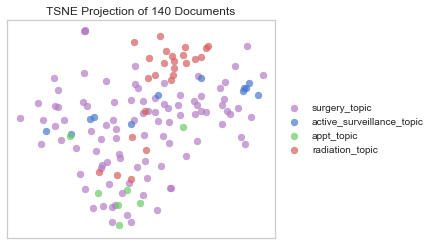

In [20]:
tsne(df, 'max_topic')

## With TFIDF

In [32]:
sums = df.sum()

In [34]:
weighted_df = df.copy()

In [35]:
for topic in ['active_surveillance_topic', 'radiation_topic', 'appt_topic', 'surgery_topic']:
    weighted_df[topic] = weighted_df[topic].map(lambda x: x / sums[topic])

In [37]:
weighted_df.head(3)

,Unnamed: 0,radiation_topic,active_surveillance_topic,appt_topic,surgery_topic,max_topic,Convo_1
0,0,0.017226,0.000963,0.000000,0.007329,surgery_topic,l394r1 interview length 014034 legend pt patie...
1,1,0.004879,0.000000,0.013985,0.010519,surgery_topic,l371u1 interview length 004701 legend pt patie...
2,2,0.007848,0.008839,0.015394,0.005708,surgery_topic,t062u1 interview length 02507 legend pt patien...


In [48]:
topics_subset = weighted_df[['active_surveillance_topic', 'radiation_topic', 'appt_topic', 'surgery_topic']]

In [50]:
weighted_df['max_topic'] = topics_subset.idxmax(axis=1)

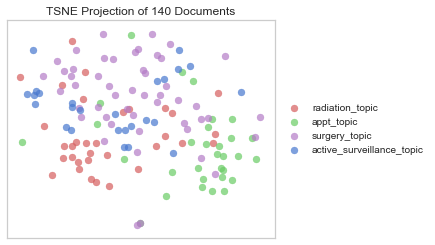

In [52]:
tsne(weighted_df, 'max_topic')

### Topics: 1, 3, 8, 12, 13, 14

In [42]:
slda = pd.read_csv('../../DataPlus/dvd_max_topics_slda.csv')

In [44]:
slda.head(3)

,Unnamed: 0,Topic1,Topic3,Topic8,Topic12,Topic13,Topic14,max_topic,Convo_1
0,0,0.056567,0.046106,0.064316,0.201860,0.117009,0.143355,Topic12,l394r1 interview length 014034 legend pt patie...
1,1,0.001989,0.063660,0.046419,0.003979,0.041777,0.028515,Topic3,l371u1 interview length 004701 legend pt patie...
2,2,0.051668,0.123610,0.034663,0.061478,0.031393,0.034663,Topic3,t062u1 interview length 02507 legend pt patien...


In [45]:
df2 = slda.dropna(subset=['Convo_1'])
tfidf2 = TfidfVectorizer()
docs2 = tfidf2.fit_transform(df['Convo_1'])

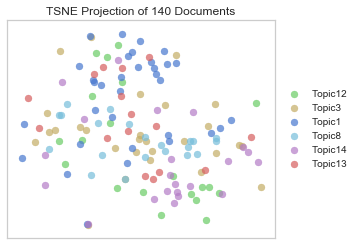

In [46]:
tsne(df2, 'max_topic')